<a href="https://colab.research.google.com/github/Donyicoder2006/Project_works/blob/main/Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN5**

In [1]:
!pip install keras-tuner
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 11.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam, Adadelta, Adamax
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data2 = pd.read_excel(r'/content/Classification_model_dataset.xlsx')

In [4]:
data2.columns

Index(['Resturant_id', 'Resturant_Name', 'Cuisine', 'Location', 'City',
       'Ratings'],
      dtype='object')

In [5]:
import numpy as np

conditions_data2 = [
    (data2['Ratings'] >= 2.4) & (data2['Ratings'] < 3.5),
    (data2['Ratings'] >= 3.5) & (data2['Ratings'] < 4.5),
    (data2['Ratings'] >= 4.5) & (data2['Ratings'] <= 4.9)
]

choices_data2 = ['poor feedback', 'median feedback', 'excellent feedback']

data2['Feedback'] = np.select(conditions_data2, choices_data2, default='Other')
data2 = data2.drop('Ratings', axis=1)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [7]:
encode = OrdinalEncoder()

In [8]:
data2.columns

Index(['Resturant_id', 'Resturant_Name', 'Cuisine', 'Location', 'City',
       'Feedback'],
      dtype='object')

In [9]:
x = data2.drop(['Feedback','Resturant_id'], axis=1)
y = data2['Feedback']

In [10]:
x_encoded = encode.fit_transform(x)
y_encoded = encode.fit_transform(y.values.reshape(-1, 1))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded.ravel(), test_size=0.2, random_state=42)

In [12]:
!pip install keras_tuner

In [13]:
import keras_tuner as kt

In [14]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
      if counter == 0:
        model.add(Dense
         (units=hp.Int('units' + str(i), min_value=5, max_value=150, step=5),
         activation=hp.Choice('activation' + str(i), ['relu', 'tanh', 'sigmoid','selu','linear','softmax','softplus','silu','mish']),
         input_dim=x_train.shape[1]
          )
         )
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9])))
        model.add(BatchNormalization())
      else:
        model.add(Dense
         (units=hp.Int('units' + str(i), min_value=8, max_value=150, step=8),
         activation=hp.Choice('activation' + str(i), ['relu', 'tanh', 'sigmoid','selu','linear','softmax','softplus','silu','mish']))
          )
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9])))
        model.add(BatchNormalization())
        counter += 1
    model.add(Dense(3, activation='softmax'))

    learning_rate = hp.Float('learning_rate', min_value=0.000000001, max_value=0.0001)
    optimizer_choice = hp.Choice('optimizer',values = ['RMSprop','Adam','SGD','Nadam','Adadelta','Adamax'])

    if optimizer_choice == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'Nadam':
        optimizer = Nadam(learning_rate=learning_rate)
    elif optimizer_choice == 'Adadelta':
        optimizer = Adadelta(learning_rate=learning_rate)
    elif optimizer_choice == 'Adamax':
        optimizer = Adamax(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [15]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 6,
                        directory = 'dir1',
                        project_name = 'project1')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
tuner.search(x_train, y_train, epochs=10, validation_data = (x_test,y_test))

Trial 6 Complete [00h 00m 43s]
val_accuracy: 0.5848701596260071

Best val_accuracy So Far: 0.5852465033531189
Total elapsed time: 00h 03m 30s


In [17]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 70,
 'activation0': 'selu',
 'dropout0': 0.8,
 'learning_rate': 8.144800006663559e-05,
 'optimizer': 'RMSprop',
 'units1': 45,
 'activation1': 'linear',
 'dropout1': 0.2,
 'units2': 75,
 'activation2': 'softplus',
 'dropout2': 0.2,
 'units3': 120,
 'activation3': 'tanh',
 'dropout3': 0.4,
 'units4': 15,
 'activation4': 'tanh',
 'dropout4': 0.1,
 'units5': 65,
 'activation5': 'mish',
 'dropout5': 0.5,
 'units6': 115,
 'activation6': 'selu',
 'dropout6': 0.2,
 'units7': 55,
 'activation7': 'selu',
 'dropout7': 0.2,
 'units8': 5,
 'activation8': 'relu',
 'dropout8': 0.1}

In [18]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=15,
                           restore_best_weights=True,
                           verbose = 1,
                           min_delta = 0.0000000000000000000000000000001,
                           mode = 'auto'
                           )

In [19]:
successful_trials = list(tuner.oracle.trials.values())
all_hyperparameters = []

for trial in successful_trials:
    all_hyperparameters.append(trial.hyperparameters.values)

print("Number of successful trials found:", len(all_hyperparameters))
print("Hyperparameters of the first successful trial:", all_hyperparameters[0])

Number of successful trials found: 6
Hyperparameters of the first successful trial: {'num_layers': 8, 'units0': 105, 'activation0': 'mish', 'dropout0': 0.3, 'learning_rate': 7.343592053578354e-06, 'optimizer': 'Adam', 'units1': 5, 'activation1': 'relu', 'dropout1': 0.1, 'units2': 5, 'activation2': 'relu', 'dropout2': 0.1, 'units3': 5, 'activation3': 'relu', 'dropout3': 0.1, 'units4': 5, 'activation4': 'relu', 'dropout4': 0.1, 'units5': 5, 'activation5': 'relu', 'dropout5': 0.1, 'units6': 5, 'activation6': 'relu', 'dropout6': 0.1, 'units7': 5, 'activation7': 'relu', 'dropout7': 0.1}


In [20]:
trained_histories = {}

for i, trial in enumerate(successful_trials):
    hp = trial.hyperparameters
    optimizer_name = hp.get('optimizer')
    trial_key = f"{optimizer_name}_trial_{i+1}"

    print(f"{optimizer_name}")
    model = build_model(hp)

    history = model.fit(x_train, y_train, epochs=30, batch_size=10, validation_data=(x_test, y_test))
    trained_histories[trial_key] = history


Adam
Epoch 1/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.4489 - loss: 1.5674 - val_accuracy: 0.5819 - val_loss: 1.2474
Epoch 2/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4594 - loss: 1.5349 - val_accuracy: 0.5807 - val_loss: 1.2224
Epoch 3/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4587 - loss: 1.5065 - val_accuracy: 0.5800 - val_loss: 1.2208
Epoch 4/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4695 - loss: 1.4744 - val_accuracy: 0.5807 - val_loss: 1.1865
Epoch 5/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4612 - loss: 1.4637 - val_accuracy: 0.5804 - val_loss: 1.1781
Epoch 6/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4679 - loss: 1.4169 - val_accuracy: 0.5807 - val_loss: 1.1562
Epoch 7/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4706 - loss: 1.3895 - val_accuracy: 0.5807 - val_loss: 1.1473
Epoch 8/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4761 - loss: 1.

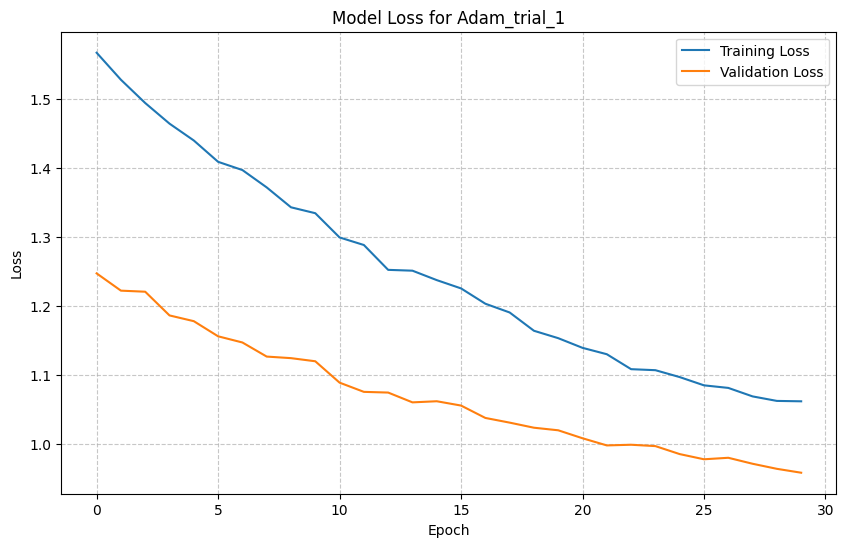

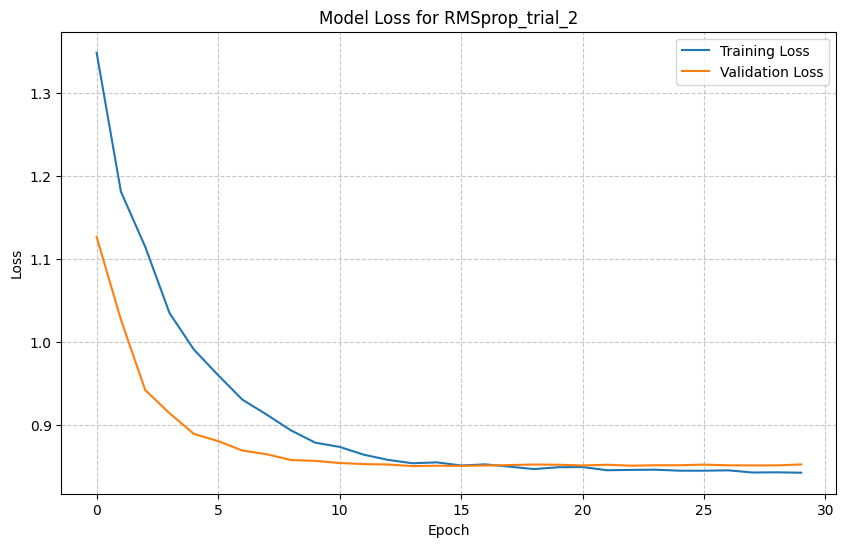

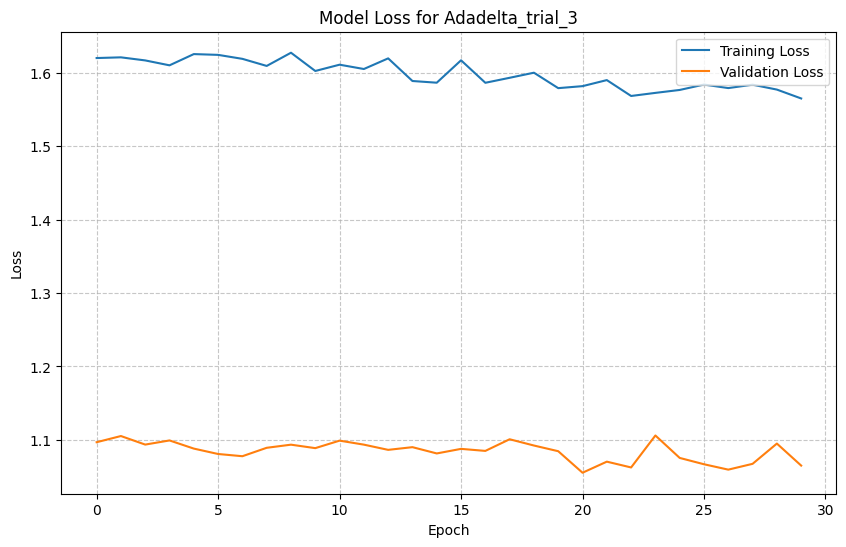

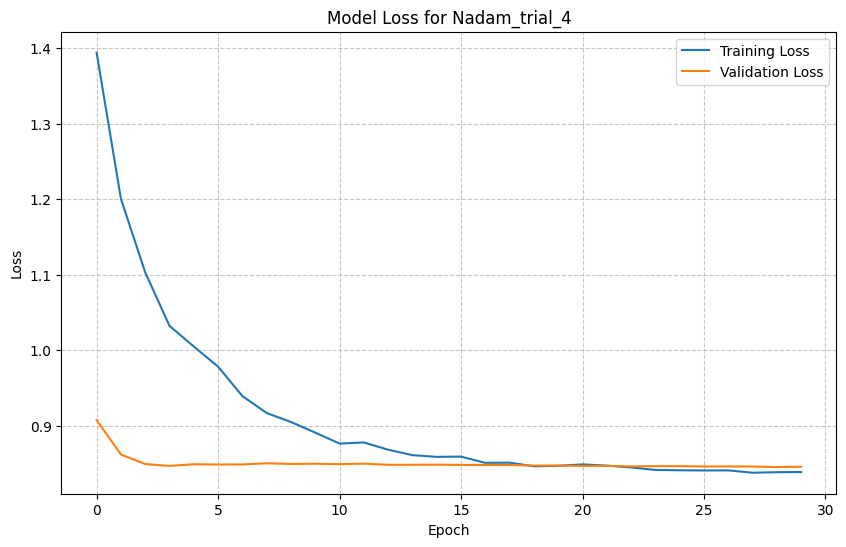

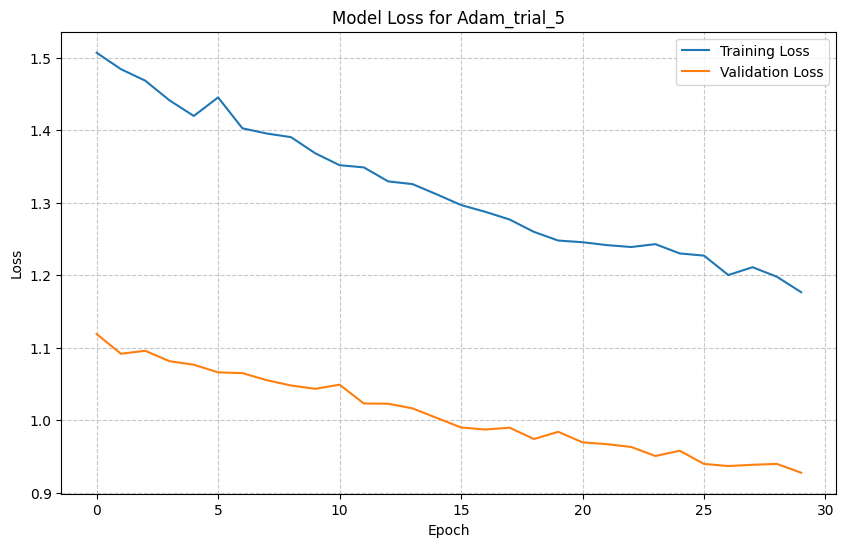

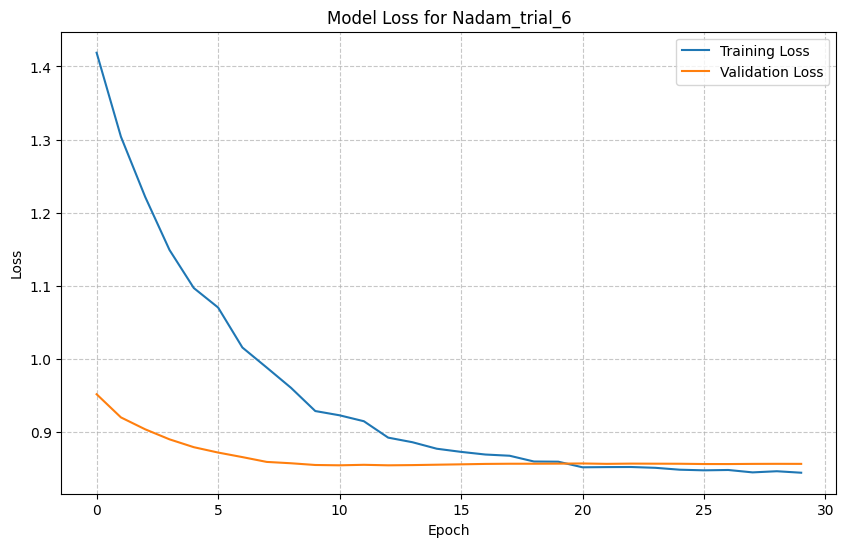

Loss plots generated for all trained models.


In [21]:
import matplotlib.pyplot as plt

for trial_key, history in trained_histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for {trial_key}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("Loss plots generated for all trained models.")


Model Structure for Adam_trial_1:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 105)            │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 105)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 105)            │           420 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 5)              │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,813 (7.08 KB)

 Trainable params: 1,533 (5.99 KB)

 Non-trainable params: 280 (1.09 KB)

Model structure saved to model_structure_Adam_trial_1.png


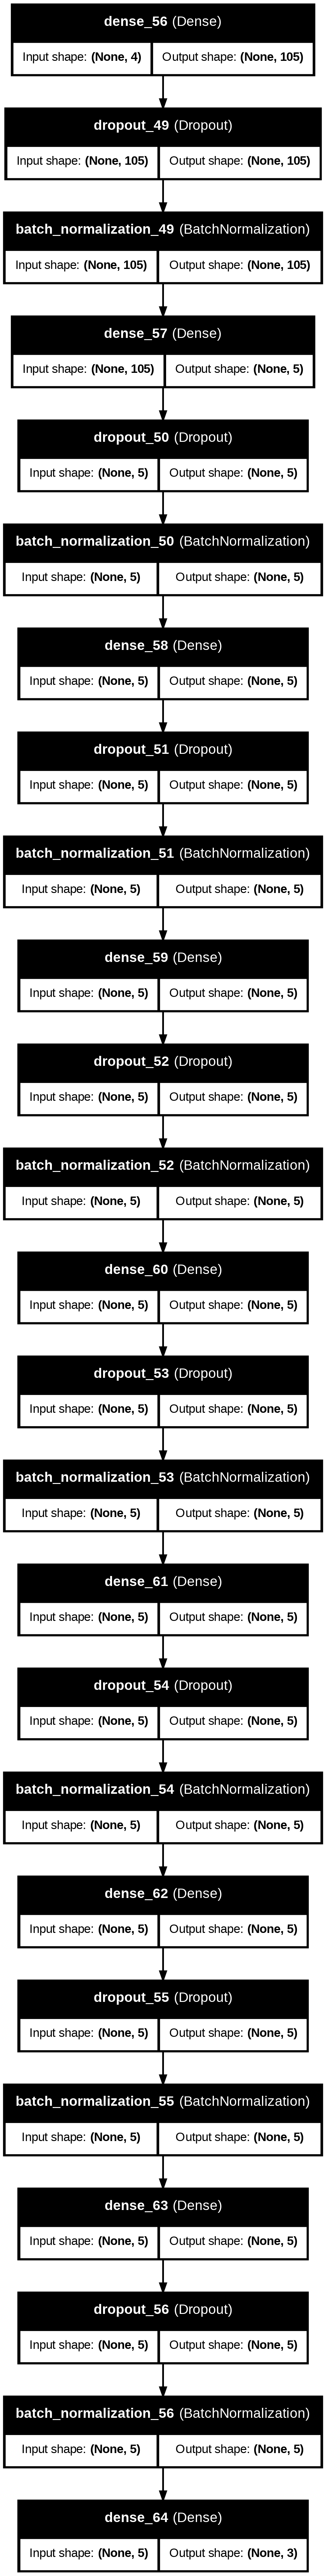


Model Structure for RMSprop_trial_2:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 70)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 70)             │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 45)             │         3,195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 45)             │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 75)             │         3,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 120)            │         9,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 15)             │         1,815 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 65)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 65)             │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 115)            │         7,590 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 115)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 115)            │           460 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 35,498 (138.66 KB)

 Trainable params: 34,368 (134.25 KB)

 Non-trainable params: 1,130 (4.41 KB)

Model structure saved to model_structure_RMSprop_trial_2.png


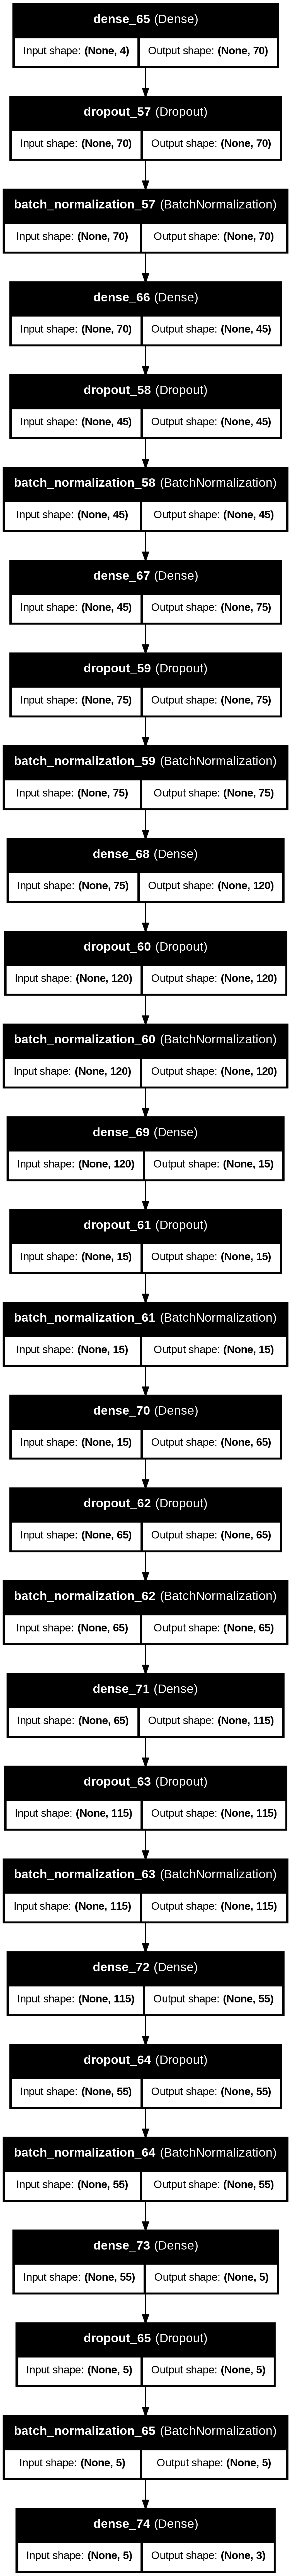


Model Structure for Adadelta_trial_3:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 25)             │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 40)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 145)            │         5,945 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 145)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 145)            │           580 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 5)              │           730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 125)            │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 125)            │           500 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 140)            │        17,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 140)            │           560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 3)              │           423 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,573 (111.61 KB)

 Trainable params: 27,613 (107.86 KB)

 Non-trainable params: 960 (3.75 KB)

Model structure saved to model_structure_Adadelta_trial_3.png


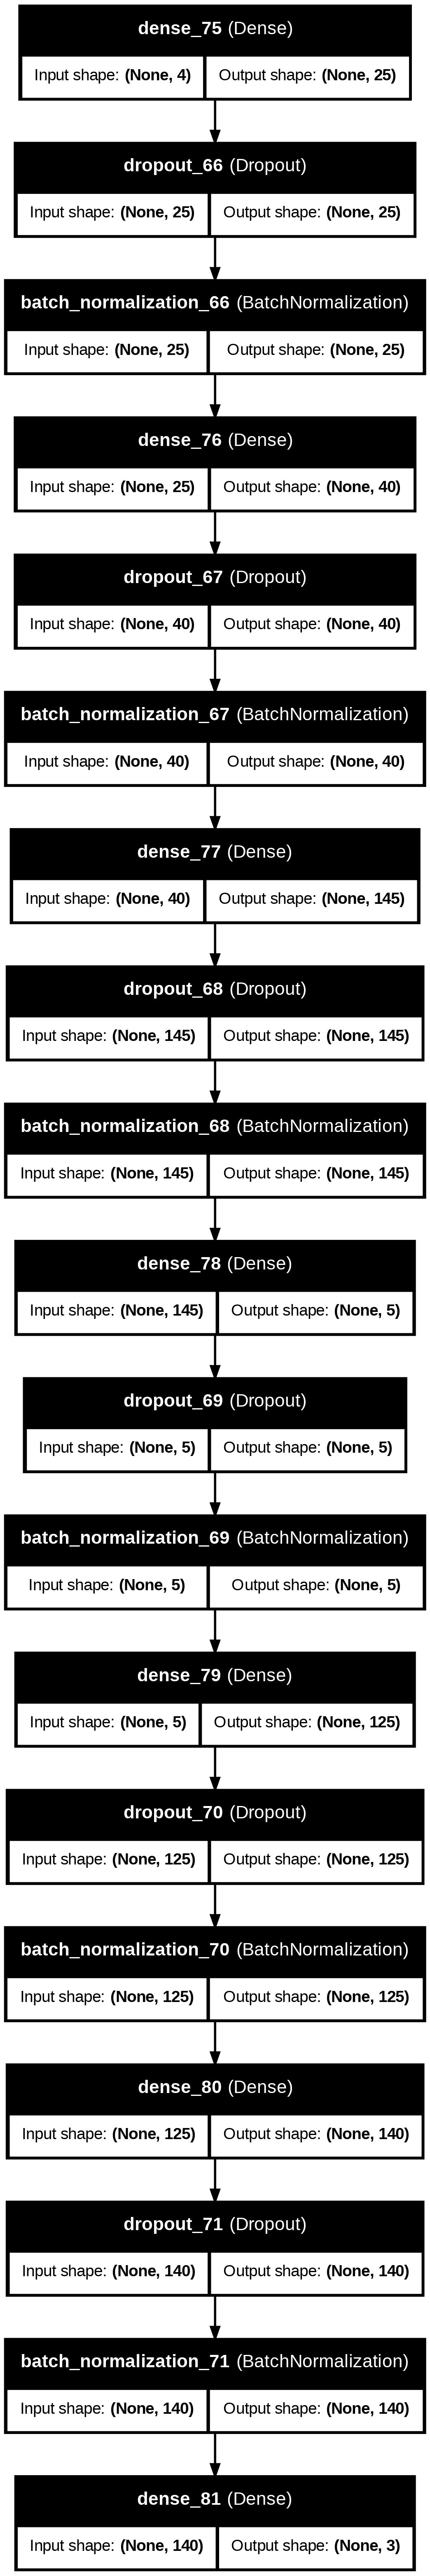


Model Structure for Nadam_trial_4:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 65)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 65)             │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 15)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 120)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 140)            │        16,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 140)            │           560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 3)              │           423 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,958 (85.77 KB)

 Trainable params: 21,278 (83.12 KB)

 Non-trainable params: 680 (2.66 KB)

Model structure saved to model_structure_Nadam_trial_4.png


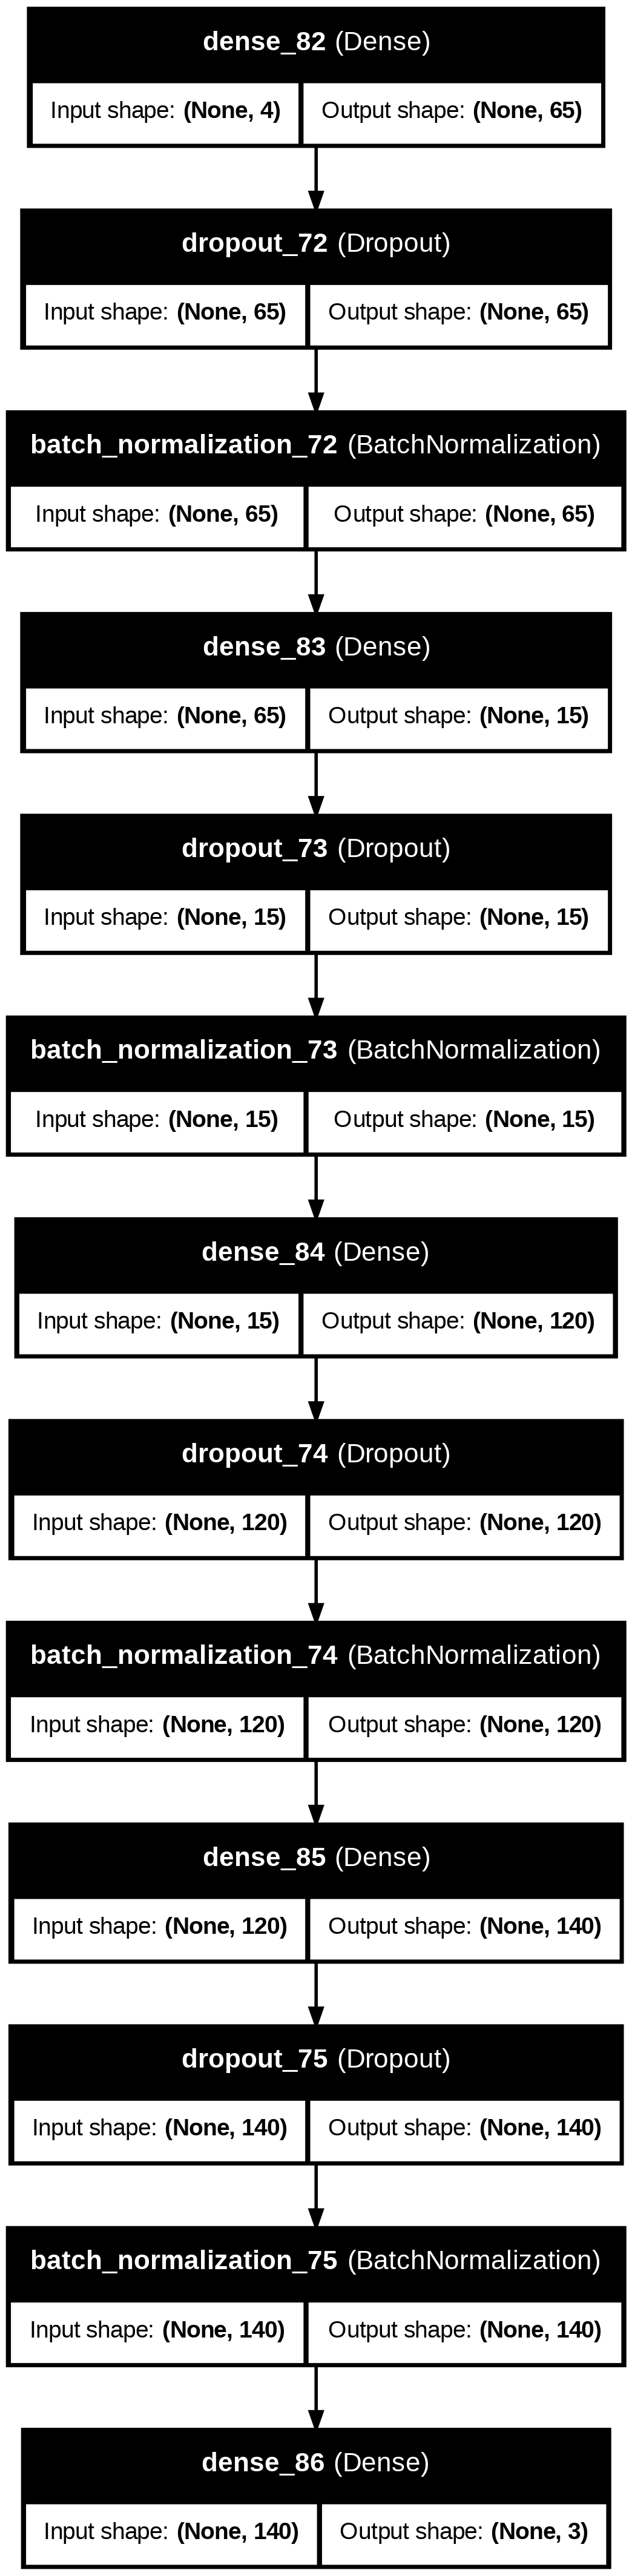


Model Structure for Adam_trial_5:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 35)             │           385 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 35)             │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 120)            │         4,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 50)             │         6,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 5)              │           255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 140)            │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 140)            │           560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 3)              │           423 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,763 (53.76 KB)

 Trainable params: 13,043 (50.95 KB)

 Non-trainable params: 720 (2.81 KB)

Model structure saved to model_structure_Adam_trial_5.png


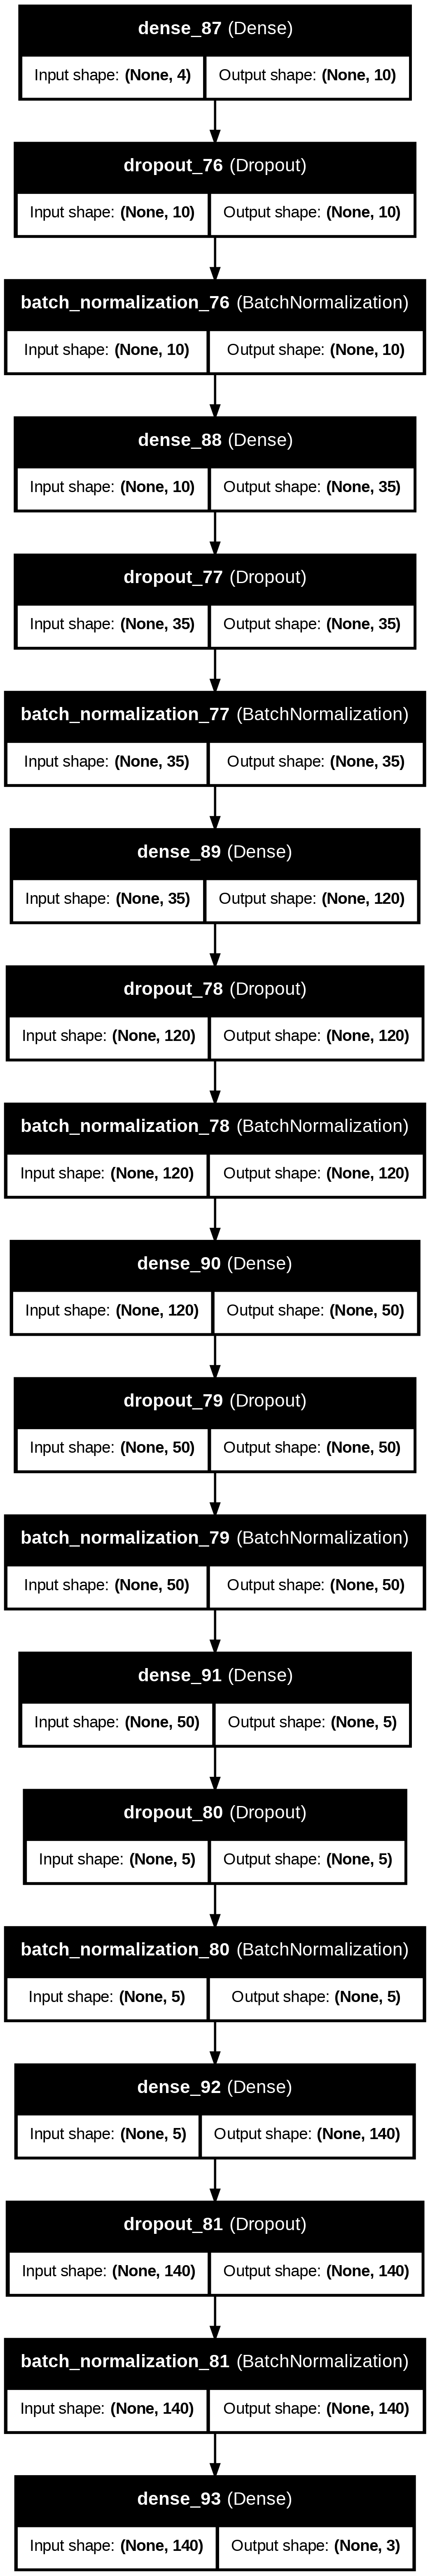


Model Structure for Nadam_trial_6:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 60)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 60)             │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 85)             │         5,185 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 85)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 85)             │           340 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 10)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 85)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 85)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_87          │ (None, 85)             │           340 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 60)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 60)             │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,223 (55.56 KB)

 Trainable params: 13,563 (52.98 KB)

 Non-trainable params: 660 (2.58 KB)

Model structure saved to model_structure_Nadam_trial_6.png


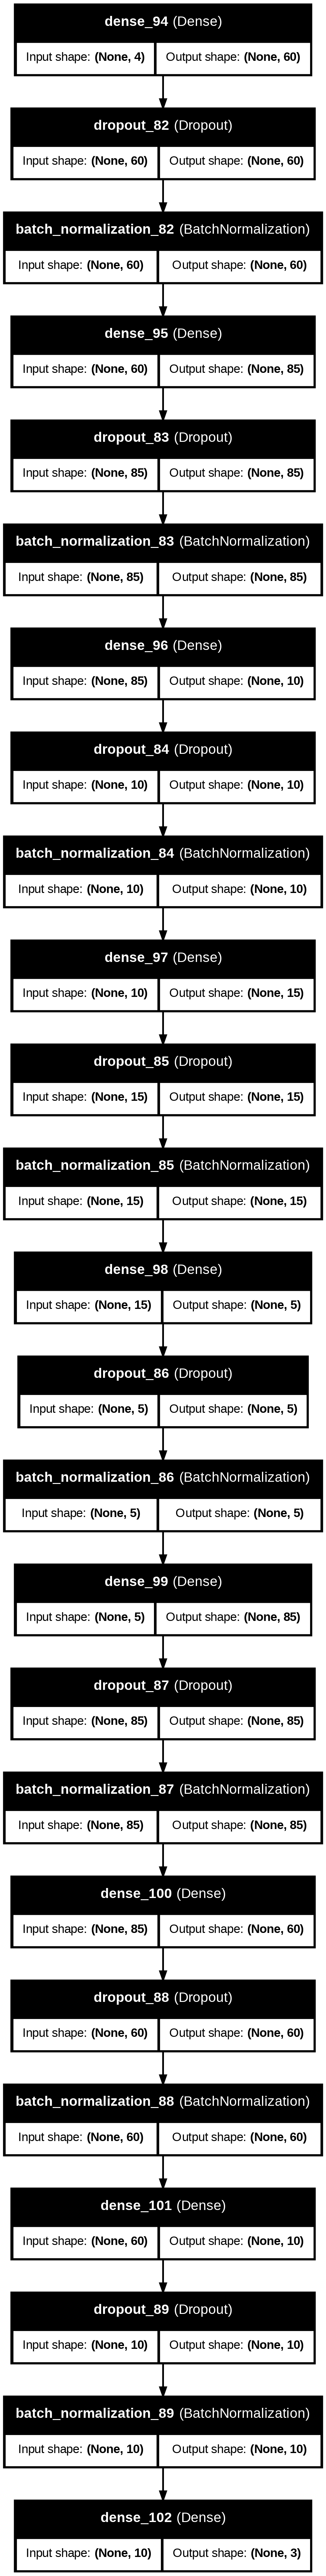

In [22]:
!pip install graphviz
import graphviz
from tensorflow.keras.utils import plot_model
from IPython.display import Image

for i, trial in enumerate(successful_trials):
    hp = trial.hyperparameters
    optimizer_name = hp.get('optimizer')
    trial_key = f"{optimizer_name}_trial_{i+1}"

    print(f"\nModel Structure for {trial_key}:")
    model = build_model(hp)
    model.summary()
    file_path = f'model_structure_{trial_key}.png'
    plot_model(model, to_file=file_path, show_shapes=True, show_layer_names=True)
    print(f"Model structure saved to {file_path}")
    display(Image(filename=file_path))


Model Structure for Best Model: Nadam_trial_4


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)               │ (None, 65)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_90          │ (None, 65)             │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 15)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 120)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 140)            │        16,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 140)            │           560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 3)              │           423 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,958 (85.77 KB)

 Trainable params: 21,278 (83.12 KB)

 Non-trainable params: 680 (2.66 KB)

Model structure saved to model_structure_Nadam_trial_4.png


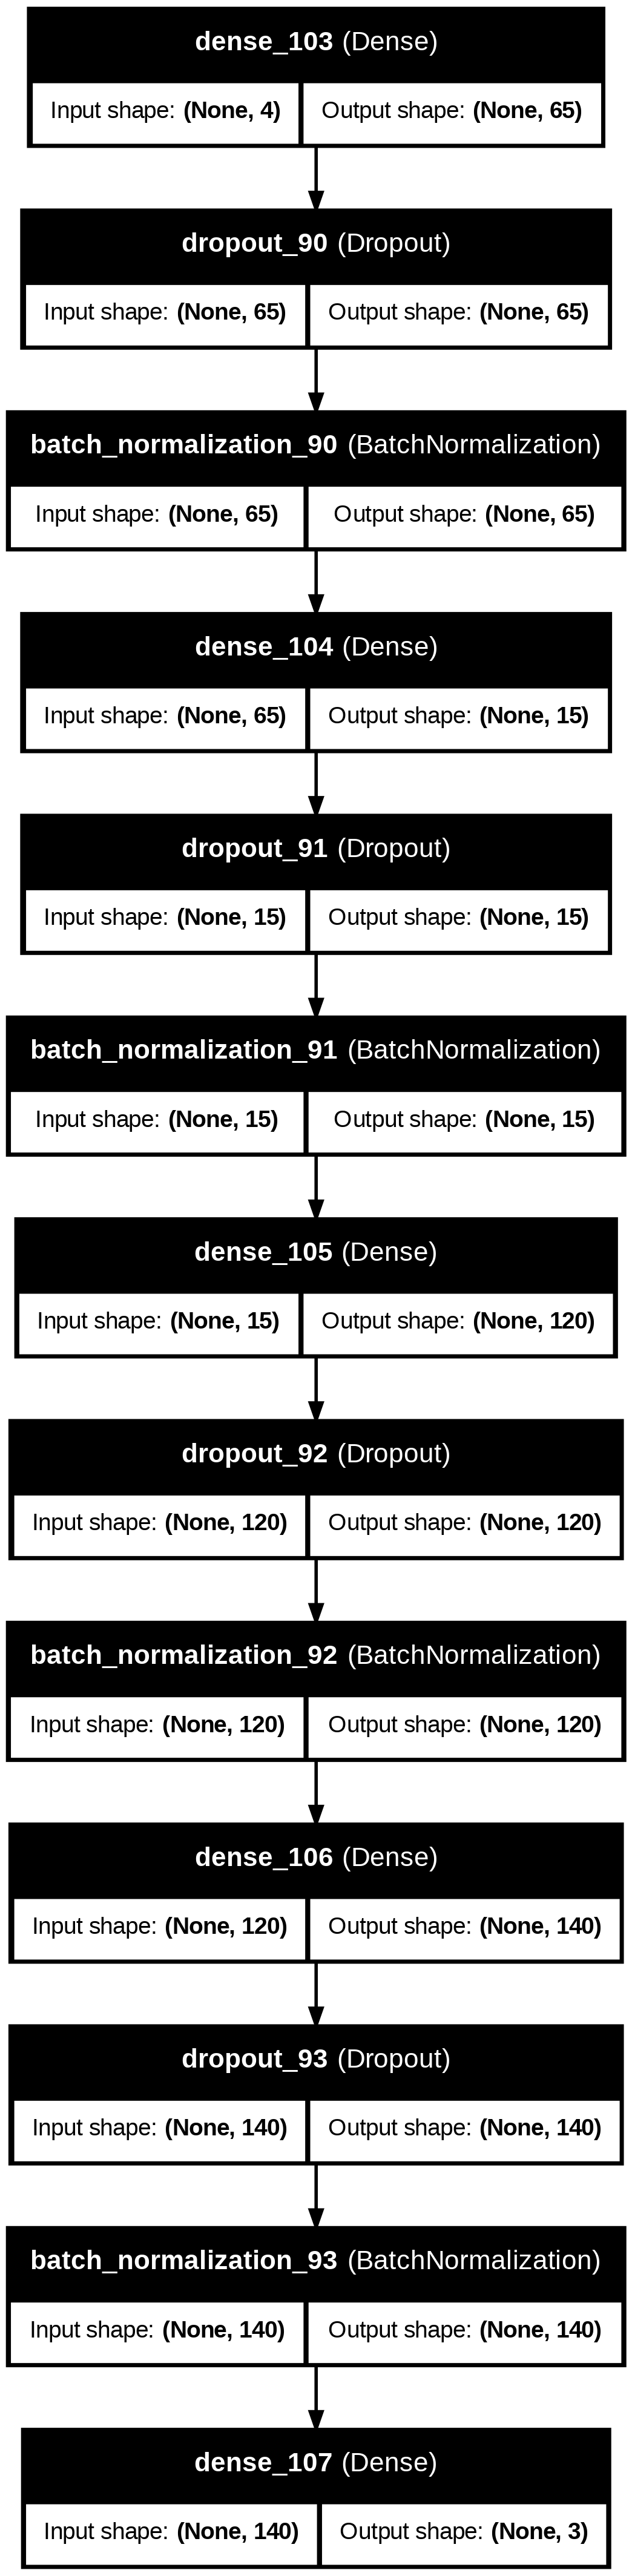

In [25]:
import keras_tuner as kt
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Find the trial corresponding to the best_trial_key
best_trial = None
for trial in successful_trials:
    optimizer_name = trial.hyperparameters.get('optimizer')
    trial_index = successful_trials.index(trial) + 1
    current_trial_key = f"{optimizer_name}_trial_{trial_index}"
    if current_trial_key == best_trial_key:
        best_trial = trial
        break

if best_trial:
    best_hp = best_trial.hyperparameters
    best_model = build_model(best_hp)

    print(f"\nModel Structure for Best Model: {best_trial_key}")
    best_model.summary()

    file_path_best_model = f'model_structure_{best_trial_key}.png'
    plot_model(best_model, to_file=file_path_best_model, show_shapes=True, show_layer_names=True)
    print(f"Model structure saved to {file_path_best_model}")
    display(Image(filename=file_path_best_model))
else:
    print(f"Could not find trial for best model: {best_trial_key}")

In [28]:
best_val_loss = float('inf')
best_history = None
best_trial_key = None

for trial_key, history in trained_histories.items():
    min_val_loss = min(history.history['val_loss'])
    if min_val_loss < best_val_loss:
        best_val_loss = min_val_loss
        best_history = history
        best_trial_key = trial_key

print(f"The best model is: {best_trial_key}")
print(f"Its best validation loss is: {best_val_loss*100}%")

The best model is: Nadam_trial_4
Its best validation loss is: 84.54640507698059%


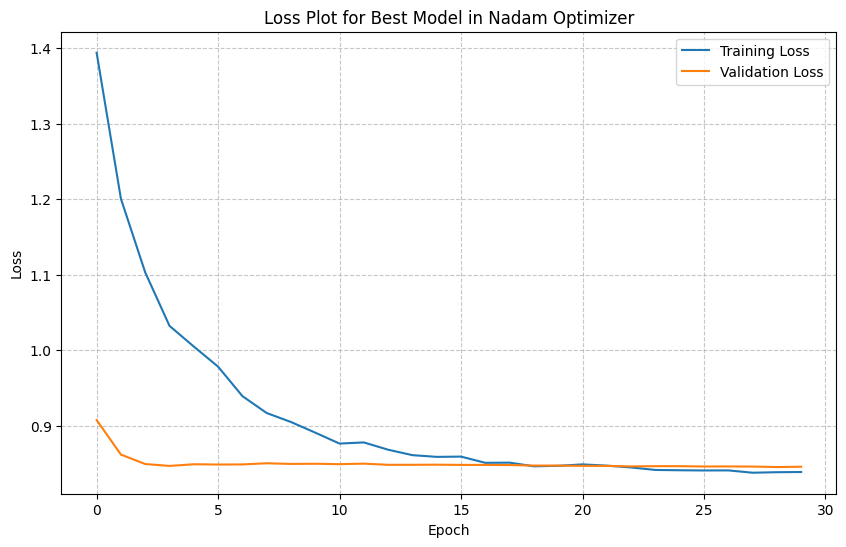

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot for Best Model in Nadam Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [30]:
Final_Model = best_model

print(f"Final_Model successfully stored. It is a {type(Final_Model)} object.")
print("\nWeights and Biases for each layer in Final_Model:")
for i, layer in enumerate(Final_Model.layers):
    print(f"\nLayer {i+1}: {layer.name}")
    weights = layer.get_weights()
    if weights:
        for j, w in enumerate(weights):
            print(f"  Weight/Bias {j+1} shape: {w.shape}")

    else:
        print("  No trainable weights or biases in this layer.")

Final_Model successfully stored. It is a <class 'keras.src.models.sequential.Sequential'> object.

Weights and Biases for each layer in Final_Model:

Layer 1: dense_103
  Weight/Bias 1 shape: (4, 65)
  Weight/Bias 2 shape: (65,)

Layer 2: dropout_90
  No trainable weights or biases in this layer.

Layer 3: batch_normalization_90
  Weight/Bias 1 shape: (65,)
  Weight/Bias 2 shape: (65,)
  Weight/Bias 3 shape: (65,)
  Weight/Bias 4 shape: (65,)

Layer 4: dense_104
  Weight/Bias 1 shape: (65, 15)
  Weight/Bias 2 shape: (15,)

Layer 5: dropout_91
  No trainable weights or biases in this layer.

Layer 6: batch_normalization_91
  Weight/Bias 1 shape: (15,)
  Weight/Bias 2 shape: (15,)
  Weight/Bias 3 shape: (15,)
  Weight/Bias 4 shape: (15,)

Layer 7: dense_105
  Weight/Bias 1 shape: (15, 120)
  Weight/Bias 2 shape: (120,)

Layer 8: dropout_92
  No trainable weights or biases in this layer.

Layer 9: batch_normalization_92
  Weight/Bias 1 shape: (120,)
  Weight/Bias 2 shape: (120,)
  Weight/